In [31]:
!pip install yfinance

In [ ]:
!pip install Backtesting

     |████████████████████████████████| 175 kB 5.2 MB/s 
  Created wheel for Backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173822 sha256=065551faaf50fb16e4dd928663fe289a26e555ce596ce2b3a89e35e834396fc3
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built Backtesting


In [ ]:
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 5.2 MB/s 


In [28]:
!pip install matplotlib

In [ ]:
import yfinance as yf
import pandas as pd

def get_historical_data(ticker):
  d = yf.Ticker(ticker)
  df = d.history(period="max")
  df.columns = df.columns.str.lower()
  df.columns = pd.Series(df.columns).str.capitalize().values
  return df.dropna()

df = get_historical_data('2498.TW')
df

,Open,High,Low,Close,Volume,Dividends,Stock splits
Date,,,,,,,
2002-03-26,24.727583,24.727583,24.727583,24.727583,4634,0.0,0.0
2002-03-27,26.432930,26.432930,26.432930,26.432930,4634,0.0,0.0
2002-03-28,28.280396,28.280396,28.280396,28.280396,4634,0.0,0.0
2002-03-29,30.127861,30.127861,30.127861,30.127861,4634,0.0,0.0
2002-04-01,32.117443,32.117443,32.117443,32.117443,449721,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-10,58.200001,59.500000,57.099998,58.099998,30003443,0.0,0.0
2022-03-11,57.599998,58.299999,56.299999,57.799999,21335904,0.0,0.0
2022-03-14,57.799999,58.599998,57.200001,57.700001,15886605,0.0,0.0


In [ ]:
import talib

# compute simple moving average using talib
sma1 = talib.SMA(df.Close, timeperiod=20)
sma2 = talib.SMA(df.Close, timeperiod=60)

# compute buy and sell signals (golden cross and death cross)
signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())

# combine long and short signals
signal = signal_long.copy()
signal[signal_short] = -1

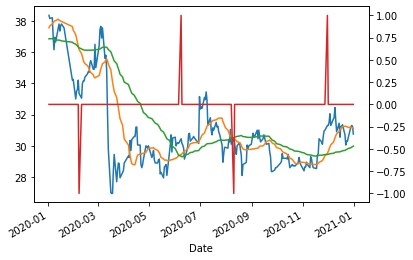

In [ ]:
df.Close['2020'].plot()
sma1['2020'].plot()
sma2['2020'].plot()
signal['2020'].astype(int).plot(secondary_y=True)

(array([730120., 731581., 733042., 734503., 735964., 737425., 738886.]),
 <a list of 7 Text major ticklabel objects>)

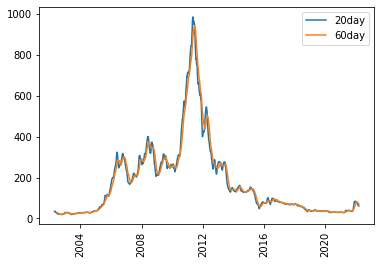

In [30]:
# new strategy idea
import matplotlib.pyplot as plt

plt.plot(sma1)
plt.plot(sma2)
plt.legend(['20day', '60day'])
plt.xticks(rotation='vertical')

In [ ]:
from backtesting import Backtest, Strategy

class Strategy(Strategy):
    
    n1 = 20
    n2 = 60
    
    def init(self):
        super().init()
        
        # Precompute the two moving averages
        close = pd.Series(self.data.Close)
        sma1 = talib.SMA(close, timeperiod=self.n1)
        sma2 = talib.SMA(close, timeperiod=self.n2)

        # Precompute signal
        signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
        signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())

        # combine signal
        signal = signal_long
        signal[signal_short] = -1
        
        # plot sma
        self.I(lambda x: sma1, 'sma1')
        self.I(lambda x: sma2, 'sma2')

        # set signal to trade
        self.signal = self.I(lambda x: signal, 'signal')

    def next(self):
        super().next()

        entry_size = self.signal[-1]

        if entry_size > 0:
            self.buy()
        elif entry_size < 0:
          for trade in self.trades:
              trade.close()

bt = Backtest(df, Strategy)
result1 = bt.run()
bt.plot()

Row(id='2337', ...)

In [12]:
result2 = bt.optimize(n1=range(5, 200, 10),
                      n2=range(5, 200, 10))
result2._strategy

/usr/local/lib/python3.7/dist-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 400 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

<Strategy Strategy(n1=85,n2=115)>

In [15]:
# 查看所有指標
li = talib.get_functions()
li

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
